<a href="https://colab.research.google.com/github/thesupriyanagpal/Speech_Emotion_Recognition_SER/blob/main/Speech_Emotion_Recognition_(SER)_%5BTESS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Emotion Recognition {SER}

## **Problem Statement**:


-------

### Overview:

The objective of this project is to build a Speech Emotion Recognition (SER) system that can classify emotions from speech signals using the Toronto Emotional Speech Set (TESS) dataset. The system will utilize machine learning and deep learning algorithms to analyze speech samples and automatically detect the emotion being expressed. This can significantly enhance real-world applications such as virtual assistants, sentiment analysis in customer service, and emotion-based user experience personalization.

The TESS dataset, which contains speech samples recorded from two female actors across seven emotional categories (angry, disgust, fear, happy, neutral, pleasant surprise, and sad), will be used for training and evaluating the model. Each actor reads the same set of 200 target words, offering a rich corpus of emotional speech for analysis.

### Data Collection:

The dataset consists of:
* Speech samples: A collection of audio files where each file represents a word spoken with a specific emotion.
* Emotion labels: The corresponding emotional categories assigned to each audio file.


##### *Dataset Link:* [TESS (Toronto Emotional Speech Set)](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess/data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 427M/428M [00:21<00:00, 21.7MB/s]
100% 428M/428M [00:22<00:00, 20.4MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] =   '/content'

In [ ]:
!mkdir input

In [ ]:
!mv /content/tess toronto emotional speech set data ~/.kaggle/

mv: cannot stat '/content/tess': No such file or directory
mv: cannot stat 'toronto': No such file or directory
mv: cannot stat 'emotional': No such file or directory
mv: cannot stat 'speech': No such file or directory
mv: cannot stat 'set': No such file or directory
mv: cannot stat 'data': No such file or directory


In [ ]:
input = '/content/tess toronto emotional speech set data'

### 1. Import Required Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import os
import librosa
import librosa.display

from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from keras import utils

### 2. Reading Data

In [ ]:
# Location of Dataset

paths = []
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

    if len(paths) == 2800:
        break

In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_sheep_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_beg_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_pick_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_kick_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_fall_neutral.wav']

In [ ]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [ ]:
# Creating Data Frame

SER = pd.DataFrame()
SER['speech'] = paths
SER['label'] = labels

In [ ]:
SER.head()

speech    label
0  /content/tess toronto emotional speech set dat...  neutral
1  /content/tess toronto emotional speech set dat...  neutral
2  /content/tess toronto emotional speech set dat...  neutral
3  /content/tess toronto emotional speech set dat...  neutral
4  /content/tess toronto emotional speech set dat...  neutral

In [ ]:
SER['label'].value_counts()

label
neutral    400
sad        400
happy      400
ps         400
angry      400
fear       400
disgust    400
Name: count, dtype: int64

In [ ]:
SER['label_count'] = SER['label'].value_counts()

### 3. **Exploratory** Data Analysis

<Axes: xlabel='label', ylabel='count'>

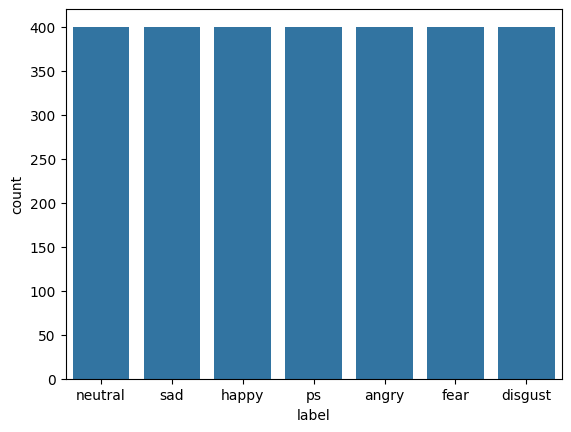

In [ ]:
sns.countplot(data = SER, x = 'label')

In [ ]:
SER

speech    label  label_count
0     /content/tess toronto emotional speech set dat...  neutral          NaN
1     /content/tess toronto emotional speech set dat...  neutral          NaN
2     /content/tess toronto emotional speech set dat...  neutral          NaN
3     /content/tess toronto emotional speech set dat...  neutral          NaN
4     /content/tess toronto emotional speech set dat...  neutral          NaN
...                                                 ...      ...          ...
2795  /content/tess toronto emotional speech set dat...  neutral          NaN
2796  /content/tess toronto emotional speech set dat...  neutral          NaN
2797  /content/tess toronto emotional speech set dat...  neutral          NaN
2798  /content/tess toronto emotional speech set dat...  neutral          NaN
2799  /content/tess toronto emotional speech set dat...  neutral          NaN

[2800 rows x 3 columns]

In [ ]:
SER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [ ]:
SER.drop('label_count', axis = 1)

speech    label
0     /content/tess toronto emotional speech set dat...  neutral
1     /content/tess toronto emotional speech set dat...  neutral
2     /content/tess toronto emotional speech set dat...  neutral
3     /content/tess toronto emotional speech set dat...  neutral
4     /content/tess toronto emotional speech set dat...  neutral
...                                                 ...      ...
2795  /content/tess toronto emotional speech set dat...  neutral
2796  /content/tess toronto emotional speech set dat...  neutral
2797  /content/tess toronto emotional speech set dat...  neutral
2798  /content/tess toronto emotional speech set dat...  neutral
2799  /content/tess toronto emotional speech set dat...  neutral

[2800 rows x 2 columns]

In [ ]:
# To Create Wave Graph

def WavePlot(data, sr, emotion):
  plt.figure(figsize = (16, 12))
  plt.title(emotion, size = 20)
  librosa.display.waveshow(data, sr = sr)
  plt.show()

In [ ]:
# To Create Spectogram Graph

def Spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize = (16, 12))
  plt.title(emotion, size = 20)
  librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
  plt.colorbar()

In [ ]:
SER['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_sheep_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_beg_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_pick_neutral.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_week_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_near_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_vine_neutral.wav'],
      dtype=object)

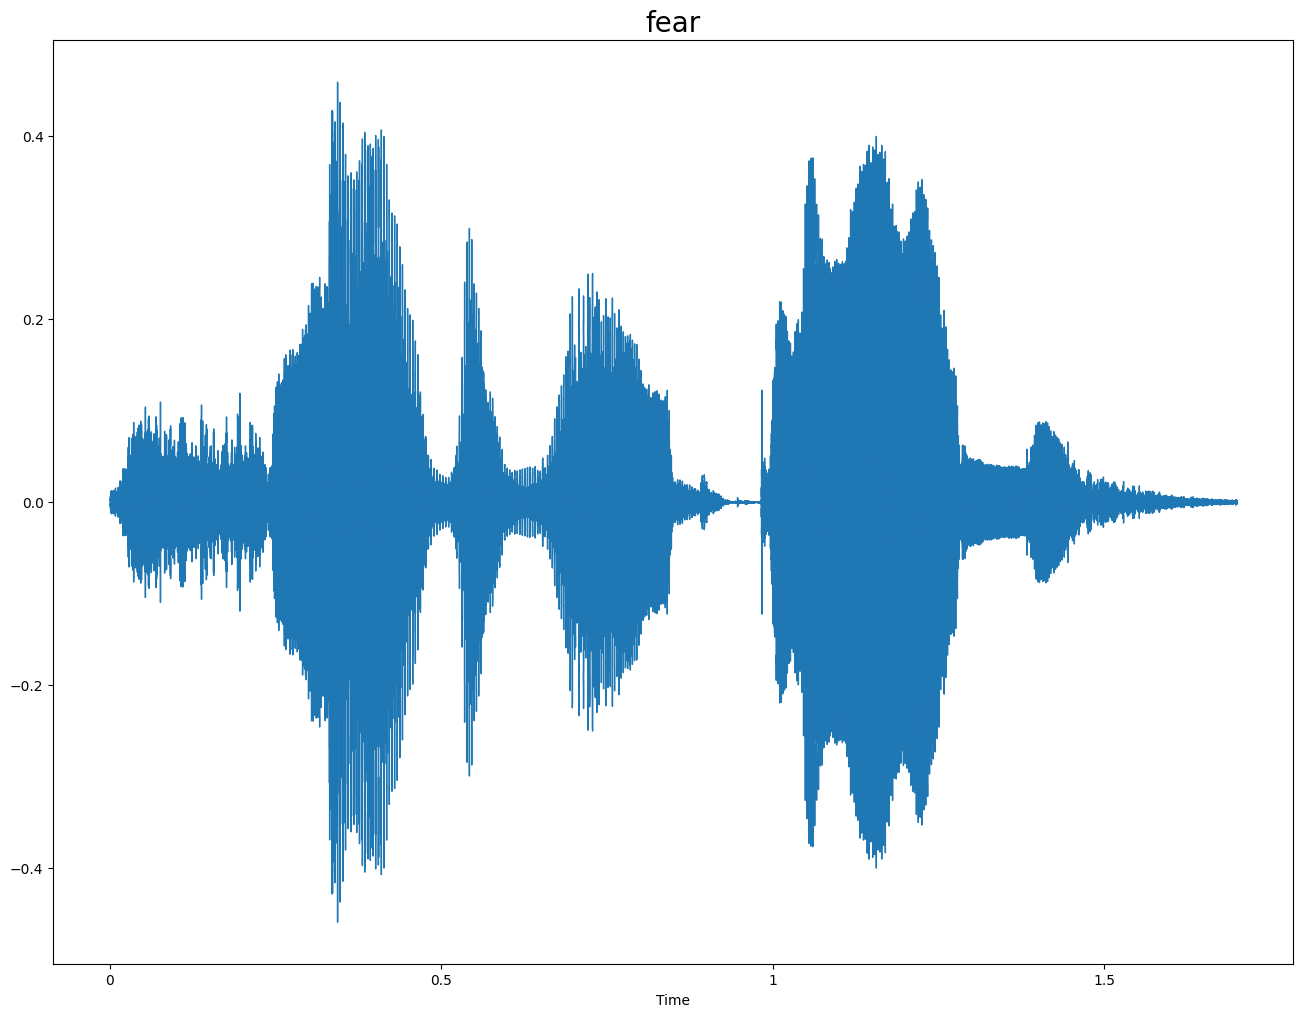

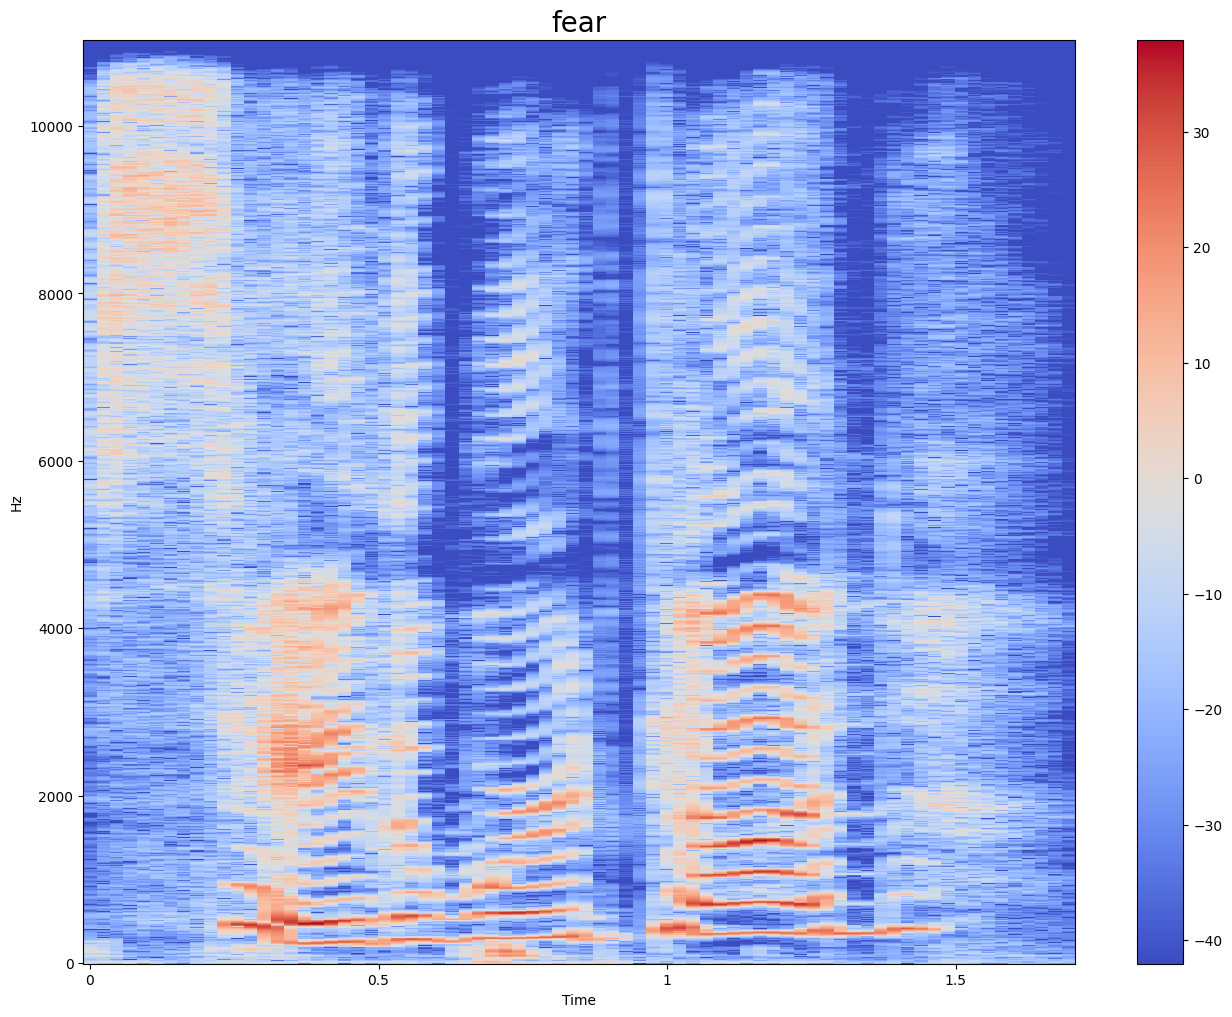

In [ ]:
# For Fear

emotion = 'fear'
path = np.array(SER['speech'][SER['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
WavePlot(data, sampling_rate, emotion)
Spectogram(data, sampling_rate, emotion)
Audio(path)

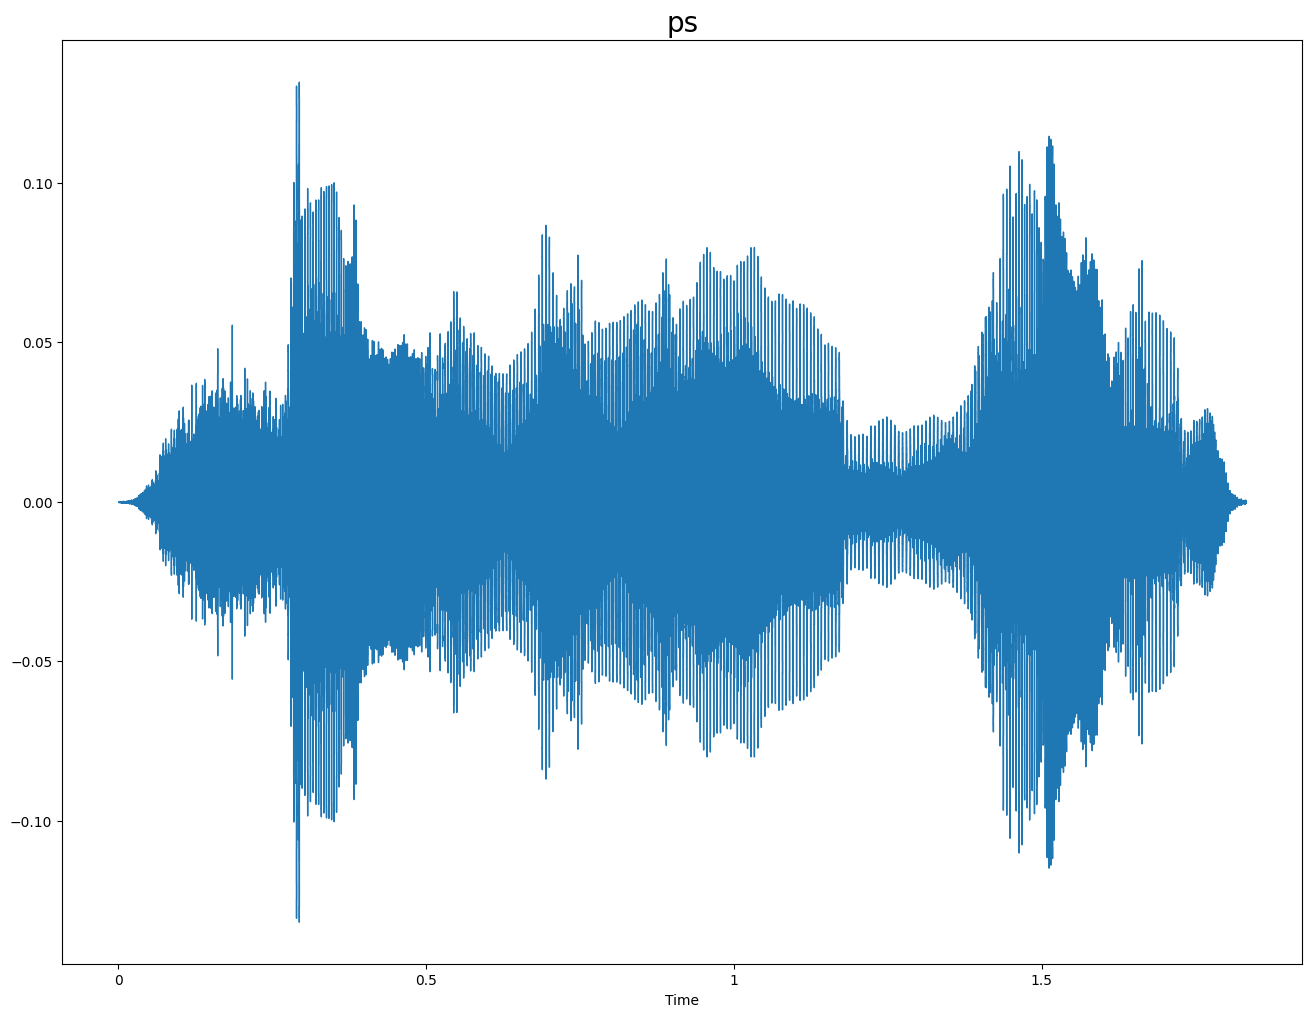

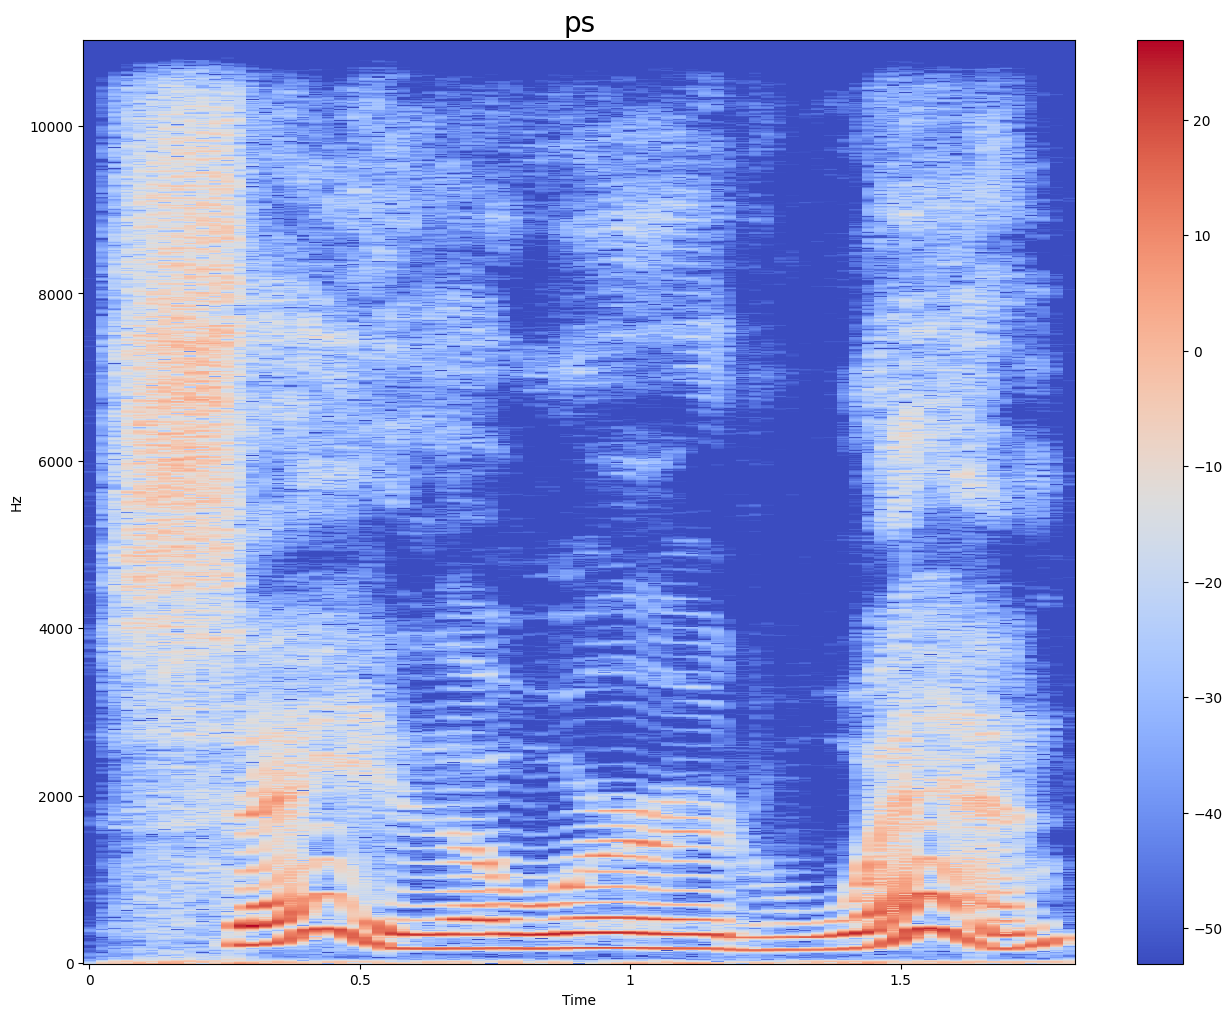

In [ ]:
# For Pleasent Surprise

emotion = 'ps'
path = np.array(SER['speech'][SER['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
WavePlot(data, sampling_rate, emotion)
Spectogram(data, sampling_rate, emotion)
Audio(path)

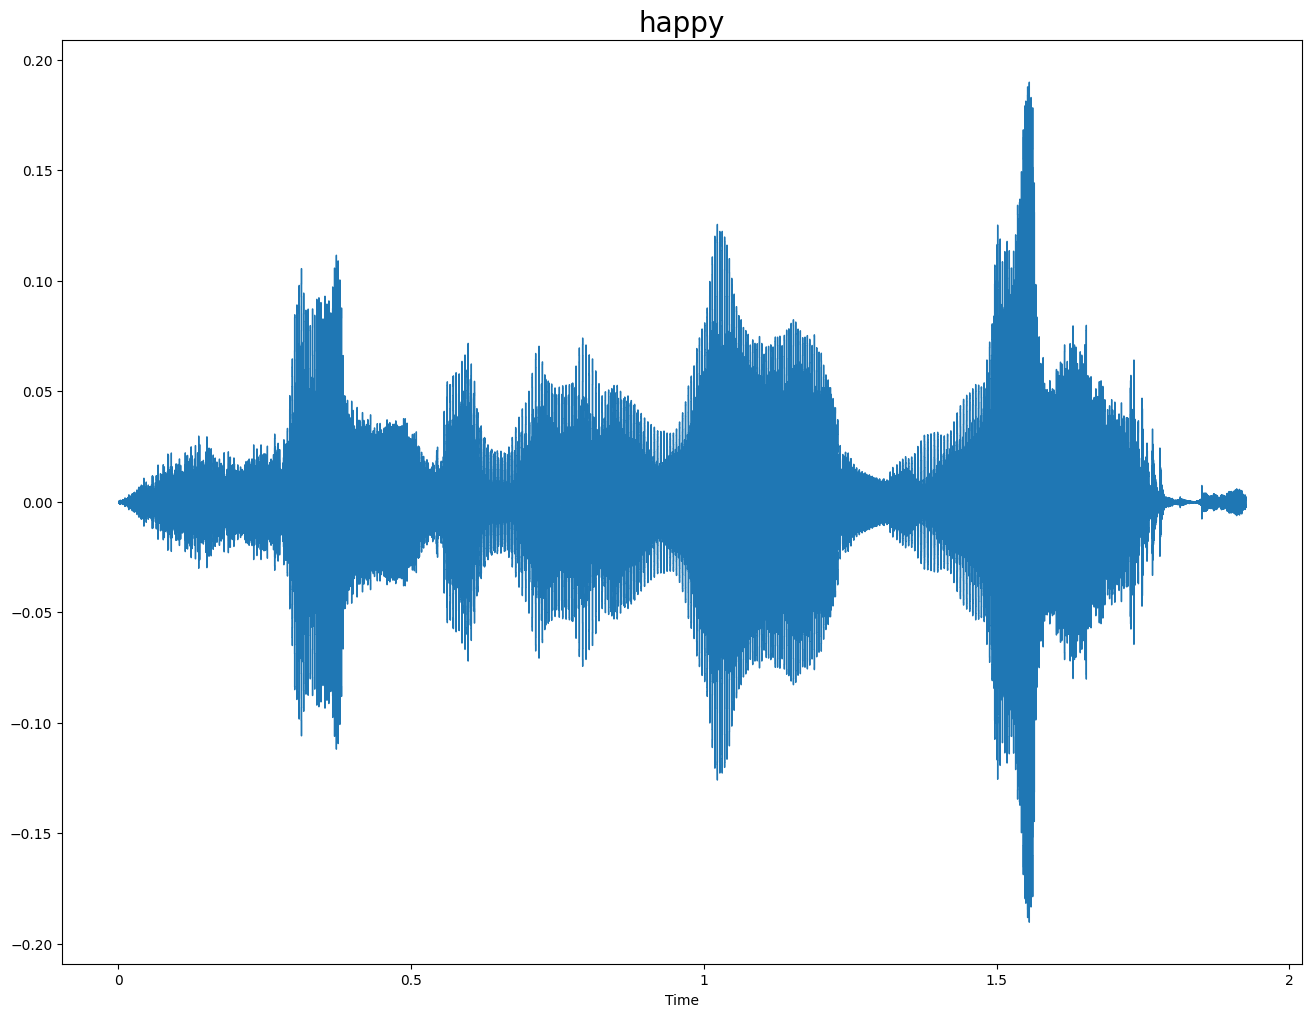

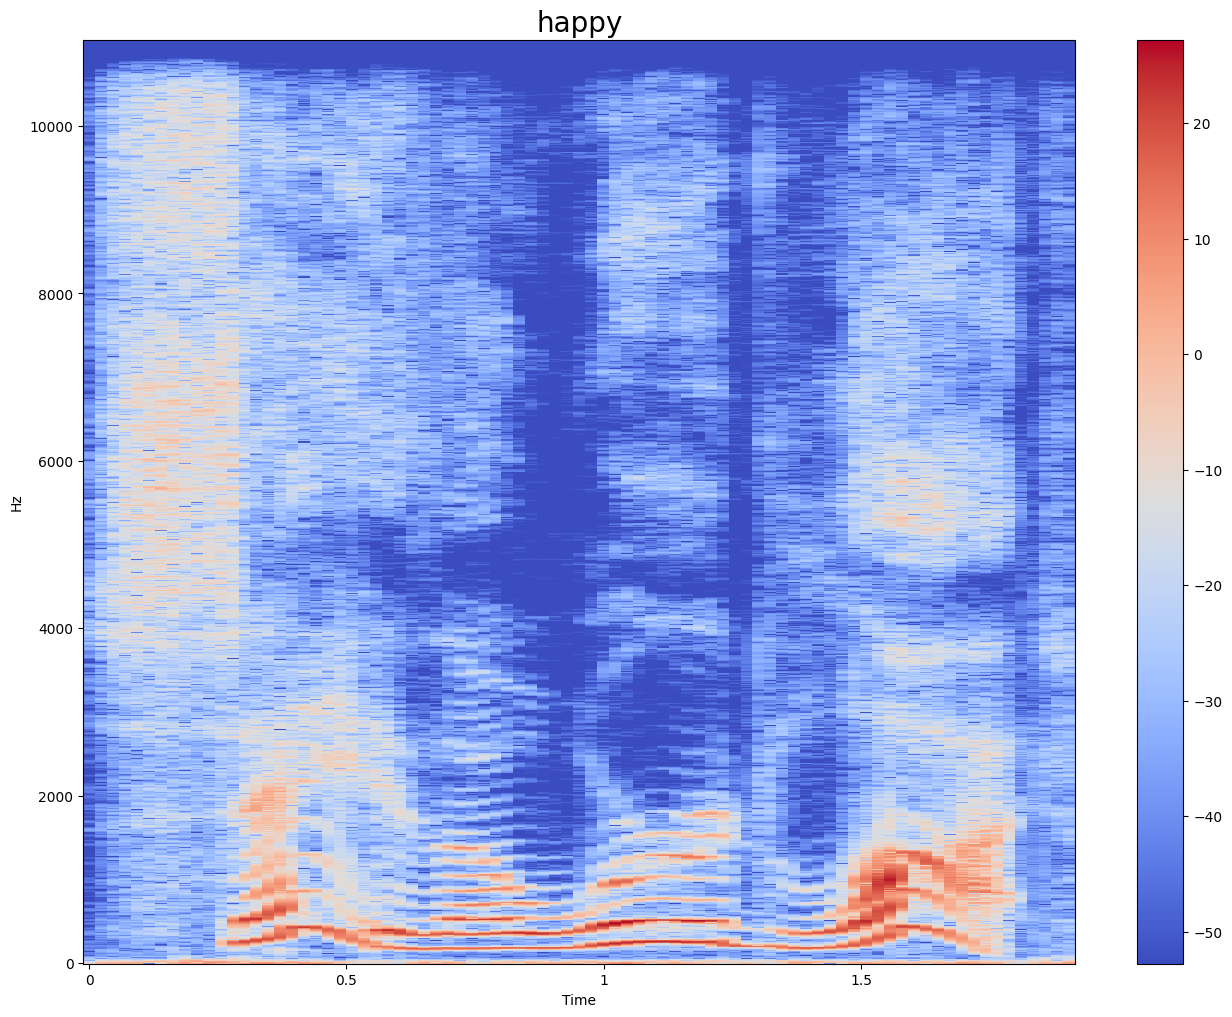

In [ ]:
# For Happy

emotion = 'happy'
path = np.array(SER['speech'][SER['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
WavePlot(data, sampling_rate, emotion)
Spectogram(data, sampling_rate, emotion)
Audio(path)

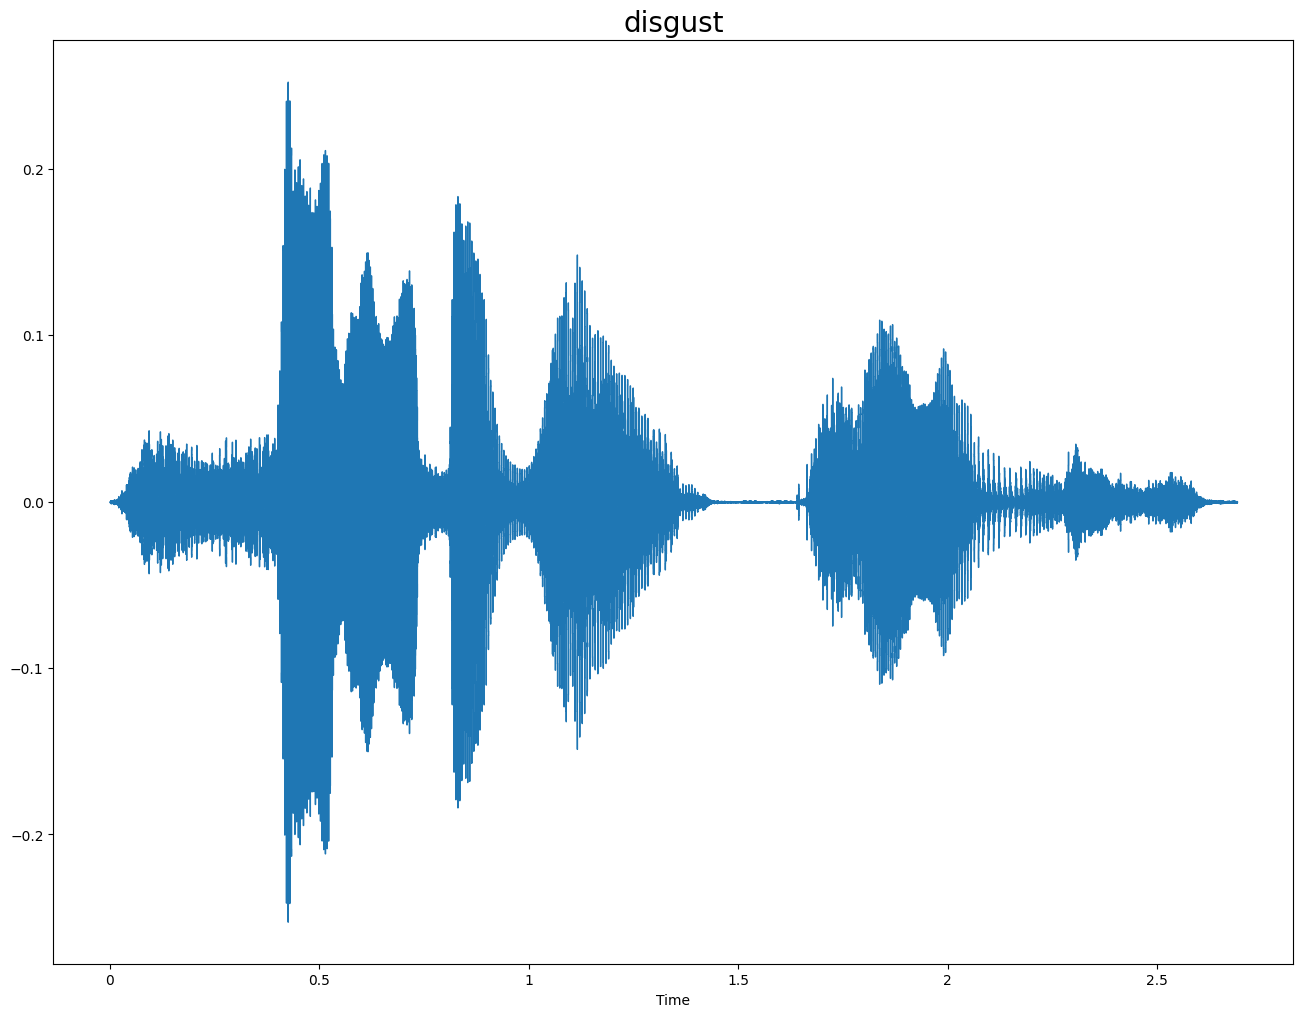

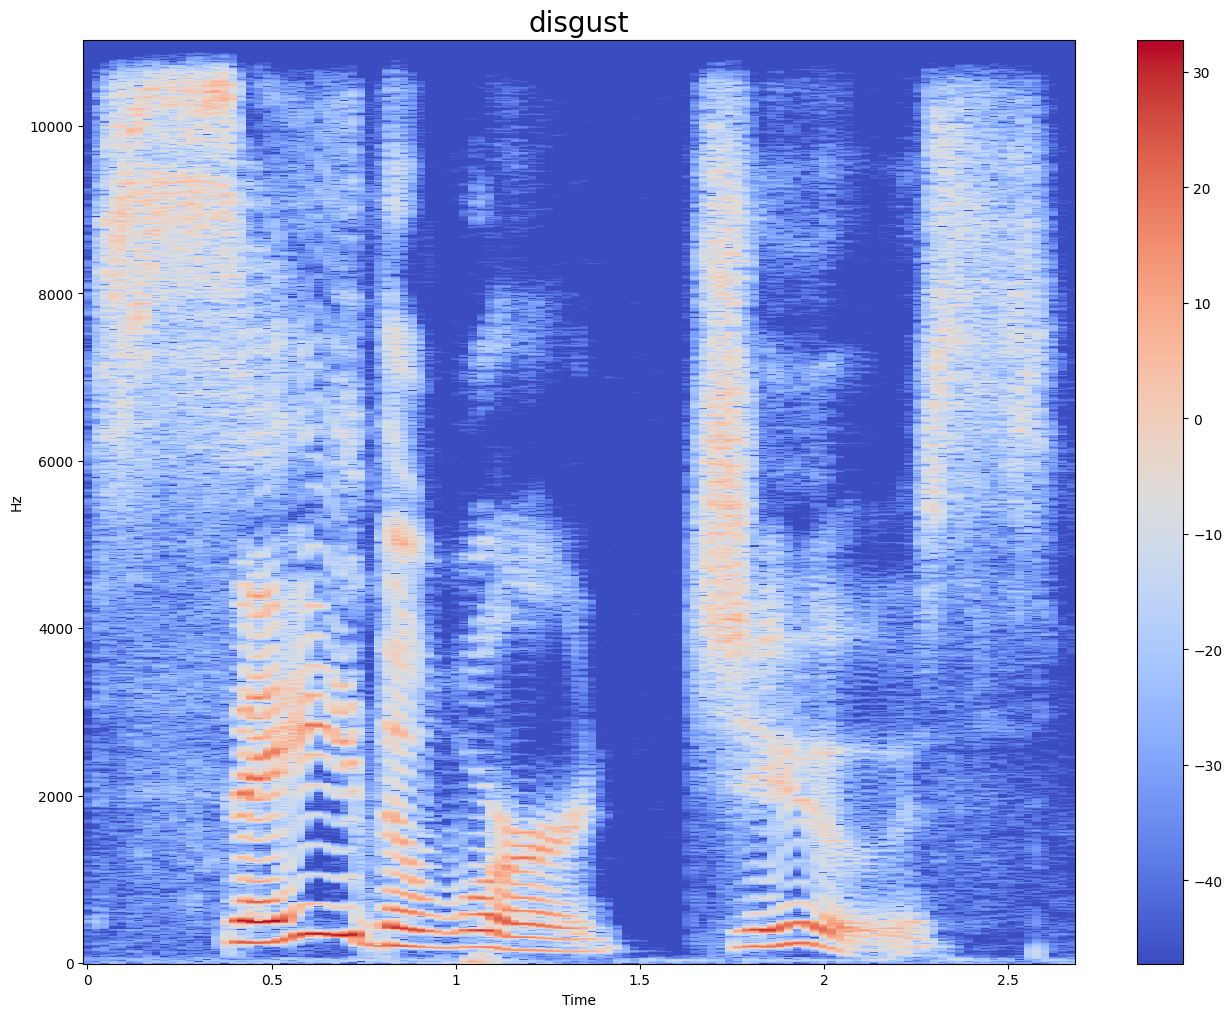

In [ ]:
# For Disgust

emotion = 'disgust'
path = np.array(SER['speech'][SER['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
WavePlot(data, sampling_rate, emotion)
Spectogram(data, sampling_rate, emotion)
Audio(path)

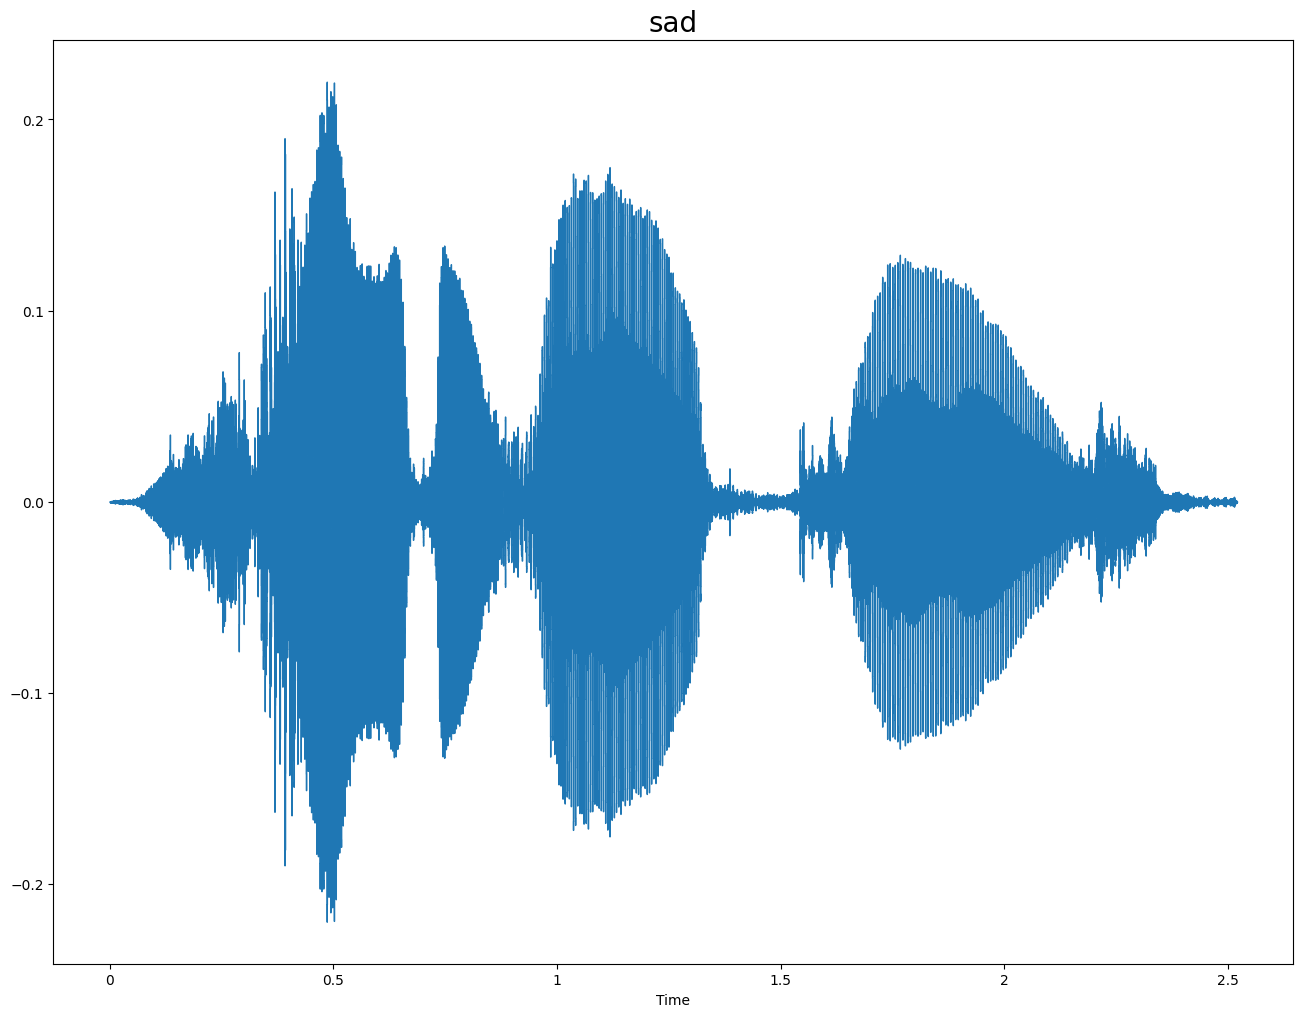

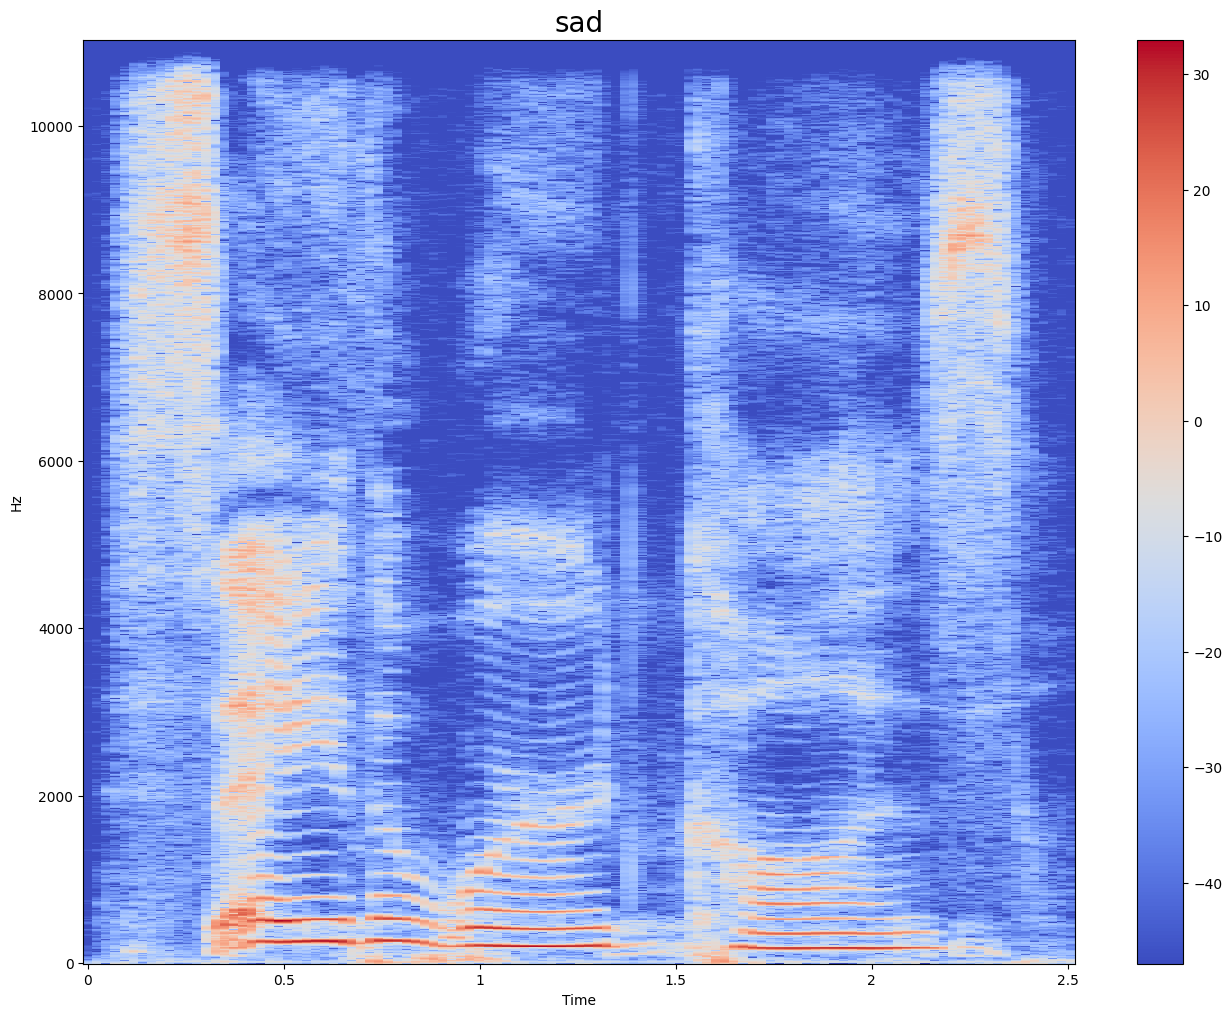

In [ ]:
# For Sad

emotion = 'sad'
path = np.array(SER['speech'][SER['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
WavePlot(data, sampling_rate, emotion)
Spectogram(data, sampling_rate, emotion)
Audio(path)

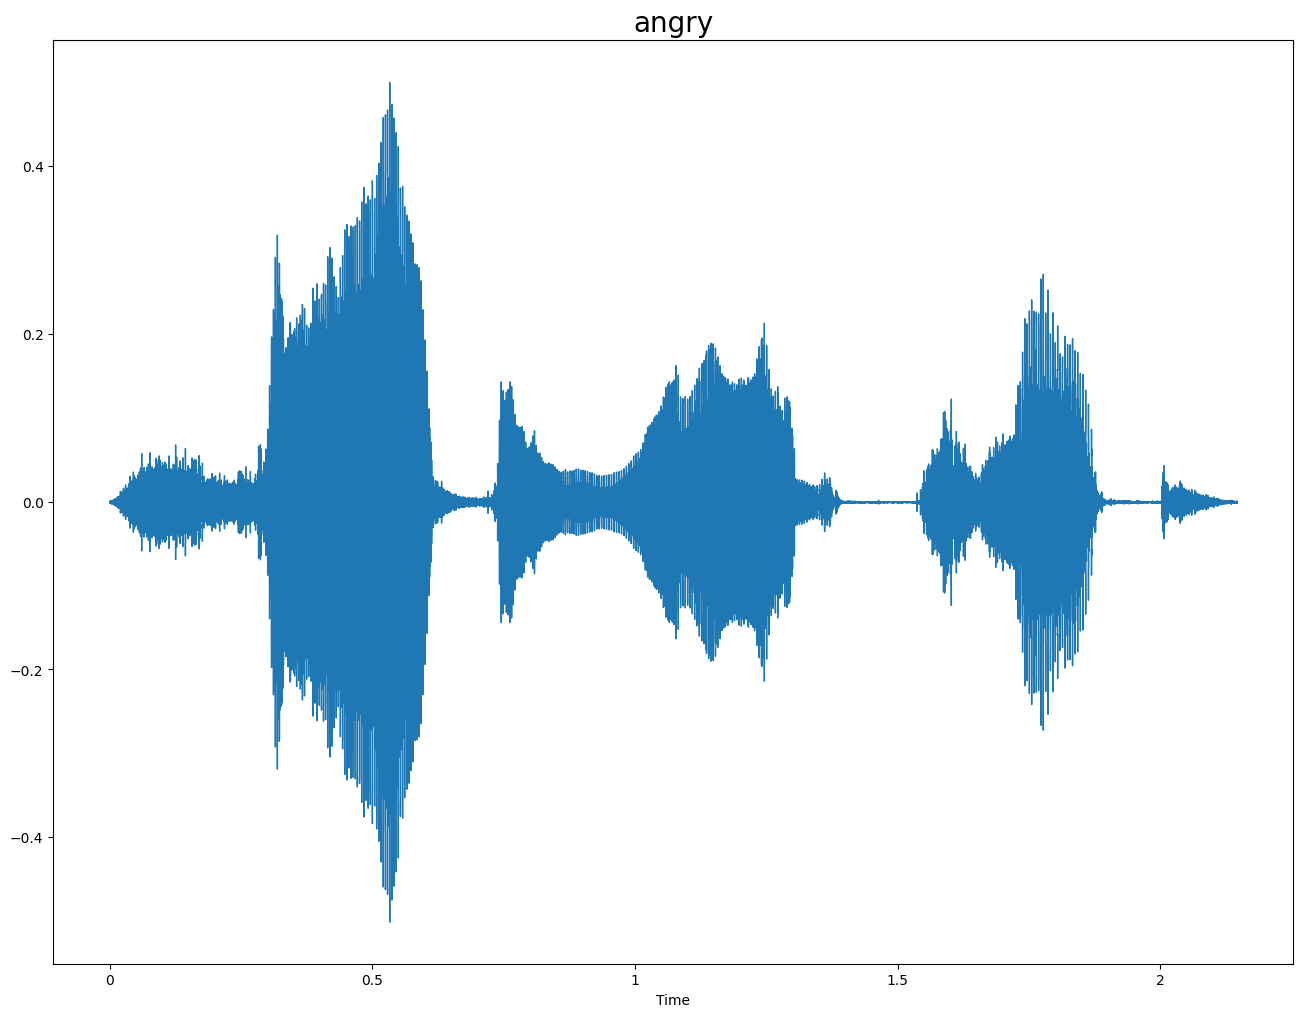

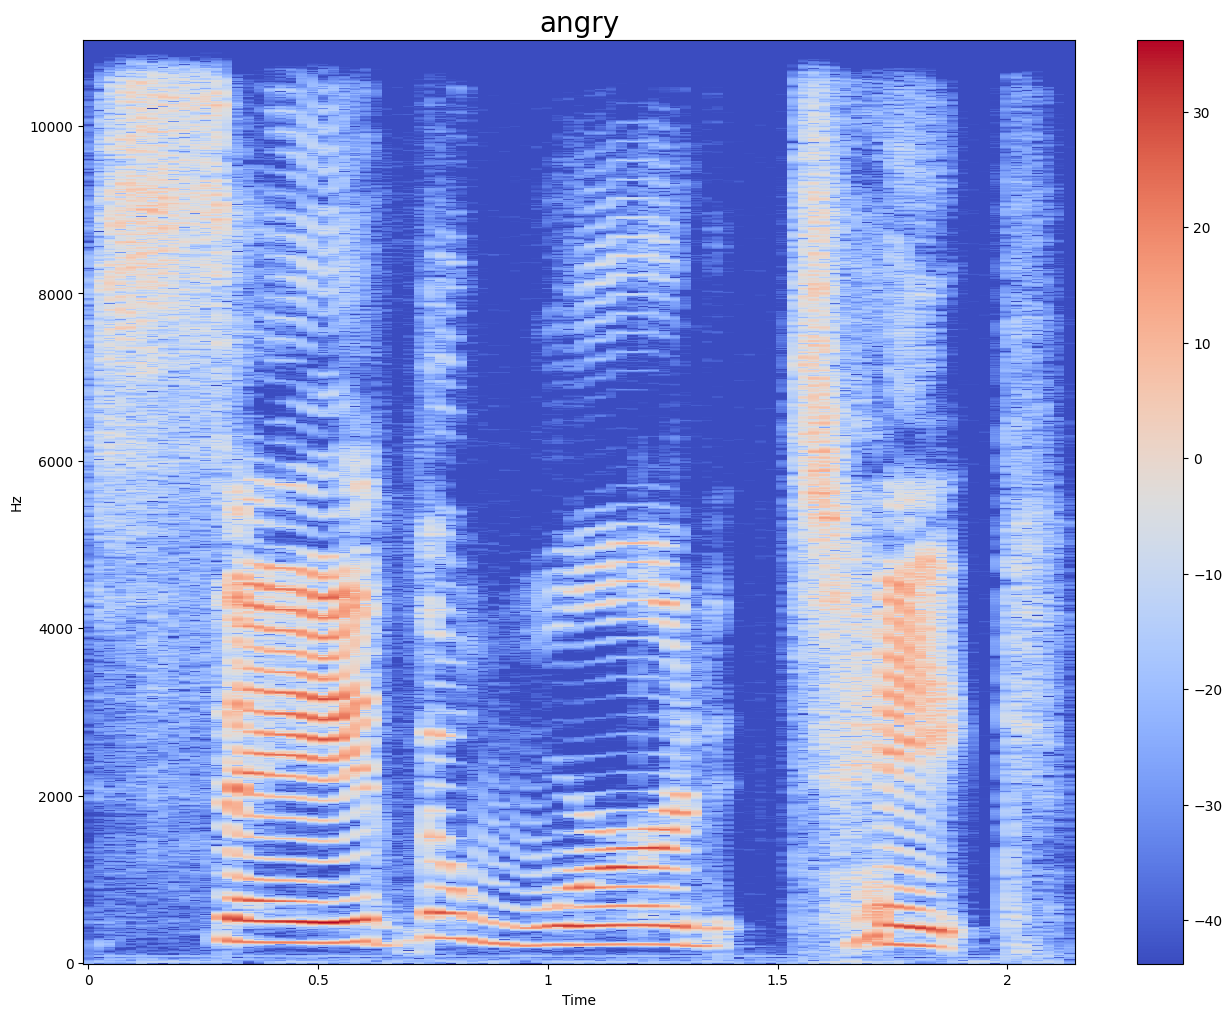

In [ ]:
# For Angry

emotion = 'angry'
path = np.array(SER['speech'][SER['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
WavePlot(data, sampling_rate, emotion)
Spectogram(data, sampling_rate, emotion)
Audio(path)

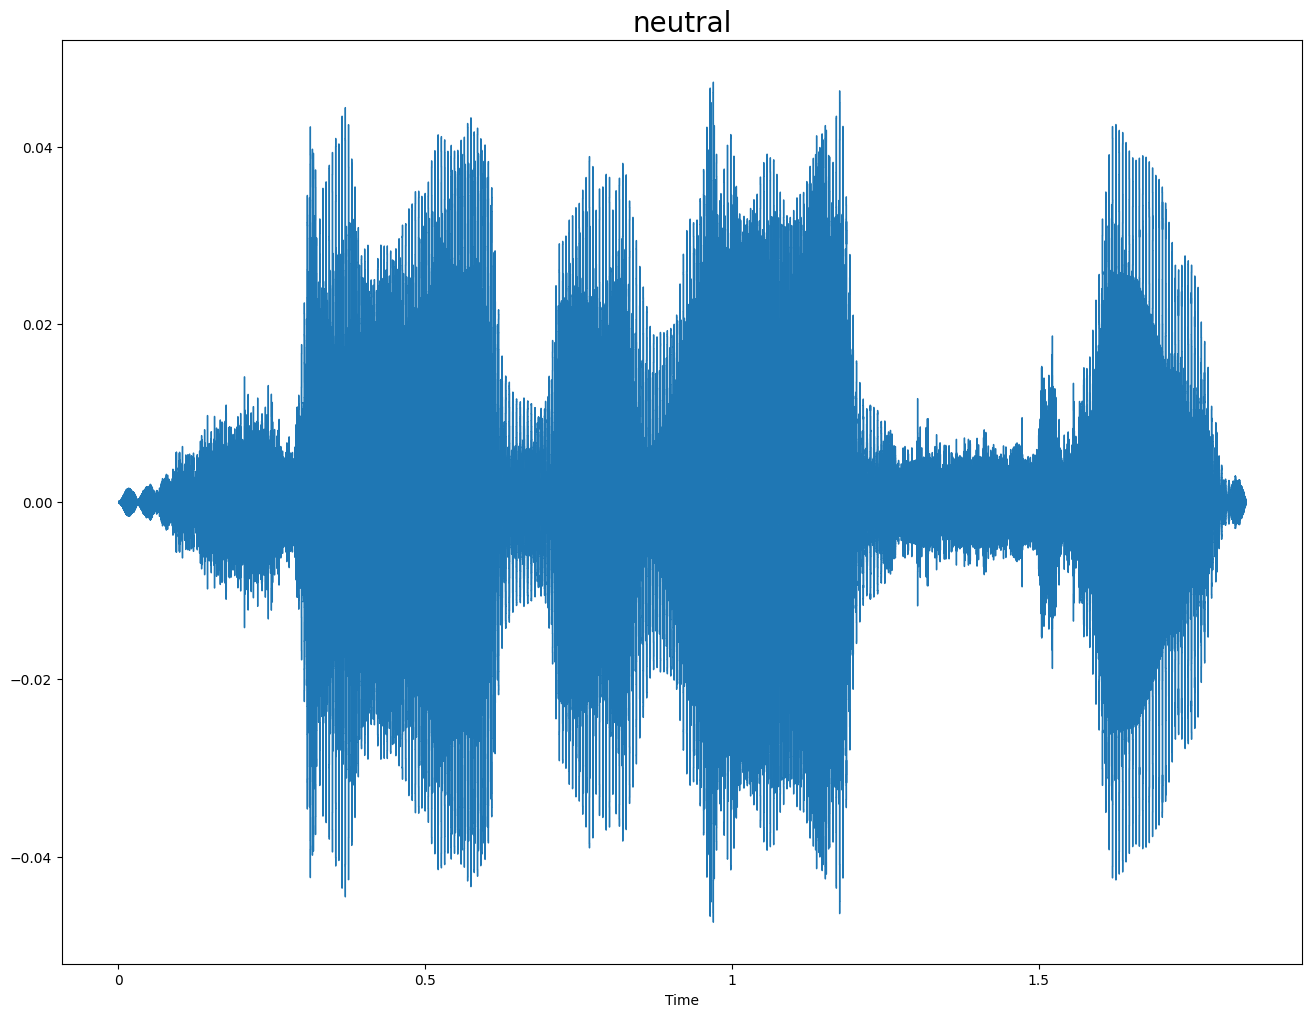

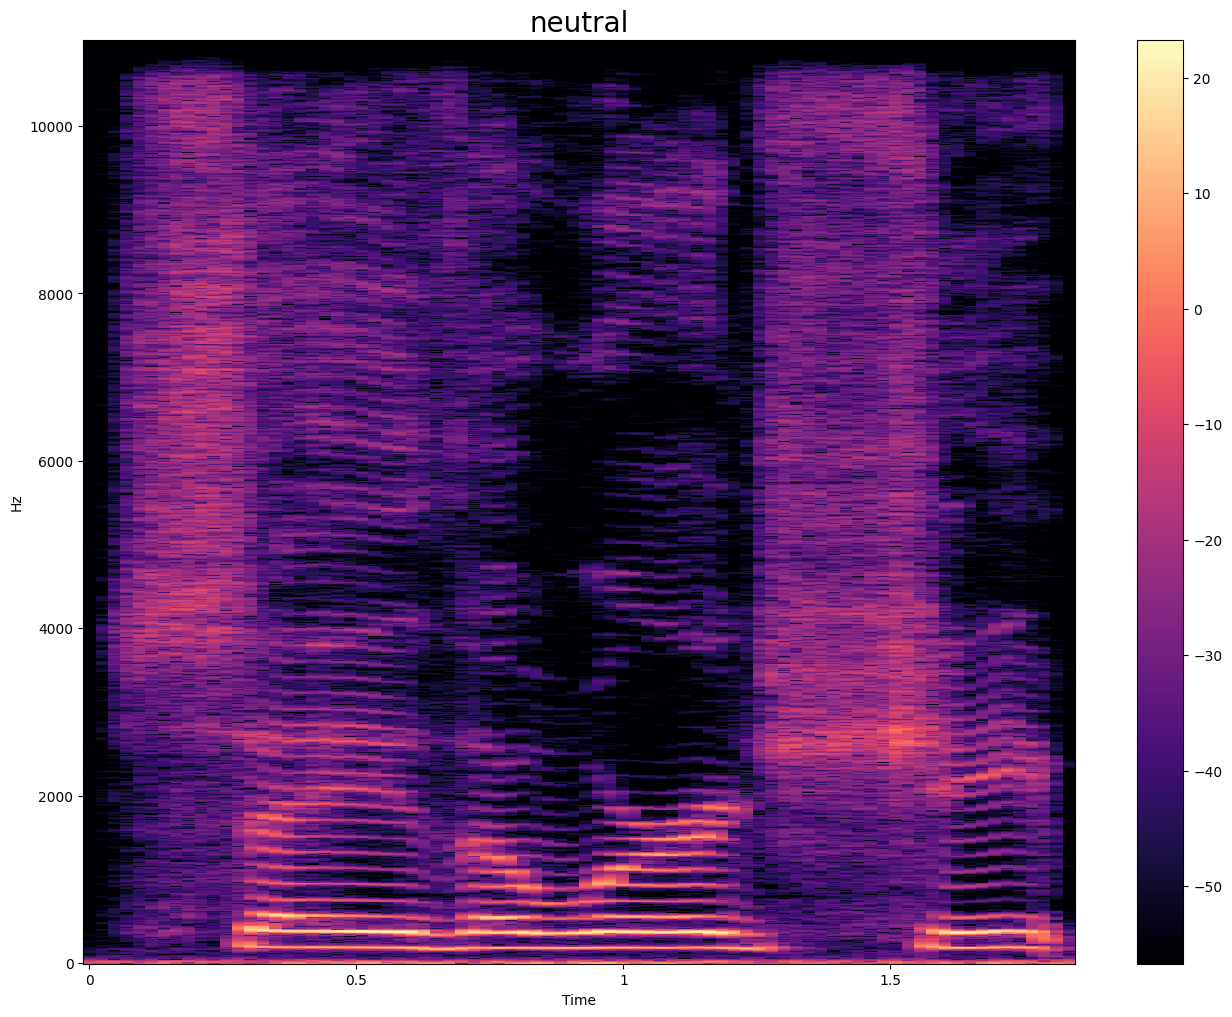

In [ ]:
# For Neutral

emotion = 'neutral'
path = np.array(SER['speech'][SER['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
WavePlot(data, sampling_rate, emotion)
Spectogram(data, sampling_rate, emotion)
Audio(path)

### 4. Feature Extraction

In [ ]:
# Define Extraction function for features

def extract_mfcc(file_name):
  y, sr = librosa.load(file_name, duration = 3, offset = 0.5)
  MFCC = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
  return MFCC

In [ ]:
extract_mfcc(SER['speech'][0])

array([-4.9402518e+02,  6.9268211e+01,  1.5272718e+01,  1.6664217e+01,
        2.4171469e+01,  5.2504320e+00, -2.6031663e+00, -6.9536862e+00,
       -1.7005569e+01, -1.1346824e+01, -1.4344852e+01,  7.8144431e-01,
       -6.0576372e+00, -4.8680690e-01,  7.7854128e+00,  4.3323097e+00,
       -4.3950047e+00,  7.0138001e+00, -3.7155211e+00, -1.1383104e+00,
        6.0732932e+00,  2.7349265e+00, -7.1520633e-01,  1.2639930e+00,
       -4.0988393e+00, -1.5387772e+00, -1.0464732e+01,  3.7249440e-01,
       -3.9901769e+00, -1.2030123e+00, -6.5256357e+00, -5.2148132e+00,
       -8.8147764e+00, -5.0302342e-02,  1.0666215e+01,  2.4070999e+01,
        3.3540504e+01,  3.5452000e+01,  2.5644016e+01,  1.2903213e+01],
      dtype=float32)

In [ ]:
X_mfcc = SER['speech'].apply(lambda x : extract_mfcc(x))

In [ ]:
X_mfcc

0       [-494.02518, 69.26821, 15.272718, 16.664217, 2...
1       [-515.75134, 82.53183, 20.052511, 11.107042, 1...
2       [-538.53253, 97.268715, 22.71904, 5.3827276, 2...
3       [-554.69196, 84.590256, 16.267973, 12.576899, ...
4       [-509.54514, 102.34795, 32.37572, -2.4730003, ...
                              ...                        
2795    [-392.4132, 77.919586, -12.309185, 27.685314, ...
2796    [-417.5061, 96.82438, 4.726276, 34.08633, 6.23...
2797    [-417.34, 86.47801, 14.299238, 34.923534, 4.37...
2798    [-428.82352, 99.77797, 2.0802312, 32.124146, 4...
2799    [-377.2521, 98.33679, -3.535061, 22.097425, 7....
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
# To increase Dimension

X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
# Encode

OHE = OneHotEncoder()
Y = OHE.fit_transform(SER[['label']])

In [ ]:
Y = Y.toarray()

In [ ]:
Y.shape

(2800, 7)

In [ ]:
# Splitting data into Train and Test set

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### 5. Create LSTM Model

In [ ]:
# Define Model

Model = Sequential([
    LSTM(256, return_sequences = False, input_shape = (40, 1)),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(7, activation = 'softmax')
])

Model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model.summary()

Model: "Sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Fit

History = Model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 50, batch_size = 64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.2376 - loss: 1.8518 - val_accuracy: 0.6304 - val_loss: 1.0543
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5625 - loss: 1.1287 - val_accuracy: 0.8286 - val_loss: 0.5905
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.7432 - val_accuracy: 0.8982 - val_loss: 0.3330
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8385 - loss: 0.5037 - val_accuracy: 0.9125 - val_loss: 0.2536
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8695 - loss: 0.3900 - val_accuracy: 0.9000 - val_loss: 0.3346
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8734 - loss: 0.4188 - val_accuracy: 0.9536 - val_loss: 0.1553
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9314 - loss: 0.2330 - val_accuracy: 0.9375 - val_loss: 0.1783
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9424 - loss: 0.2094 - val_accuracy: 0.9571 - val_los

### 6. Plotting Results

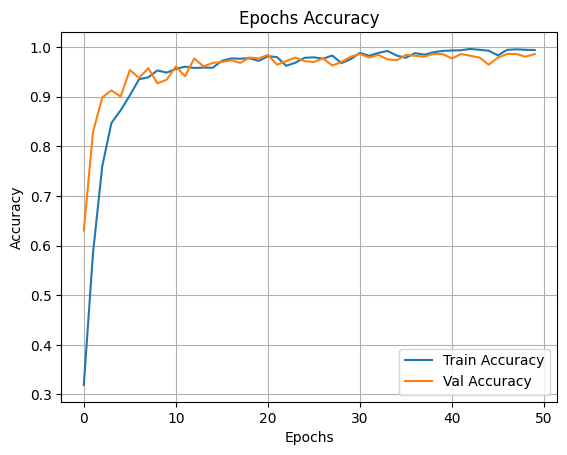

In [ ]:
# Epochs Accuracy

Epochs = list(range(50))
Accuracy = History.history['accuracy']
Val_Accuracy = History.history['val_accuracy']

# Graph

plt.plot(Epochs, Accuracy, label = 'Train Accuracy')
plt.plot(Epochs, Val_Accuracy, label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epochs Accuracy")
plt.legend()
plt.grid()
plt.show()

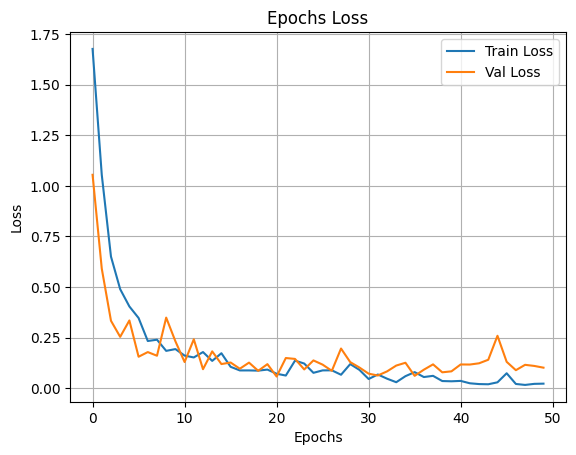

In [ ]:
# Epochs Loss

Loss = History.history['loss']
Val_Loss = History.history['val_loss']

# Graph

plt.plot(Epochs, Loss, label = 'Train Loss')
plt.plot(Epochs, Val_Loss, label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs Loss")
plt.legend()
plt.grid()
plt.show()

### 7. Model Prediction

In [ ]:
# Prediction

Pred = Model.predict(X_val)
Pred_Classes = np.argmax(Pred, axis = 1)
Val_Classes = np.argmax(Y_val, axis = 1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
# Accuracy Score

AS = accuracy_score(Pred_Classes, Val_Classes)

print("Accuracy Score:\n", AS)
print("Accuracy Score as Percentage:\n", AS * 100,"%")

Accuracy Score:
 0.9857142857142858
Accuracy Score as Percentage:
 98.57142857142858 %


In [ ]:
# Confusion Matrix

Conf_Matrix = confusion_matrix(Val_Classes, Pred_Classes)

print("Confusion Matrix:\n", Conf_Matrix)

Confusion Matrix:
 [[89  0  0  0  0  1  0]
 [ 0 75  0  0  0  2  0]
 [ 1  0 78  0  0  0  0]
 [ 2  0  0 72  0  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  1  0  1  0 77  0]
 [ 0  0  0  0  0  0 91]]


In [ ]:
# Classification Report

Target_Emotions = ['disgust', 'sad', 'neutral', 'ps', 'fear', 'angry', 'happy']

CR = classification_report(Val_Classes, Pred_Classes, target_names = Target_Emotions)

print("Classification Report:\n", CR)

Classification Report:
               precision    recall  f1-score   support

     disgust       0.97      0.99      0.98        90
         sad       0.99      0.97      0.98        77
     neutral       1.00      0.99      0.99        79
          ps       0.99      0.97      0.98        74
        fear       1.00      1.00      1.00        70
       angry       0.96      0.97      0.97        79
       happy       1.00      1.00      1.00        91

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



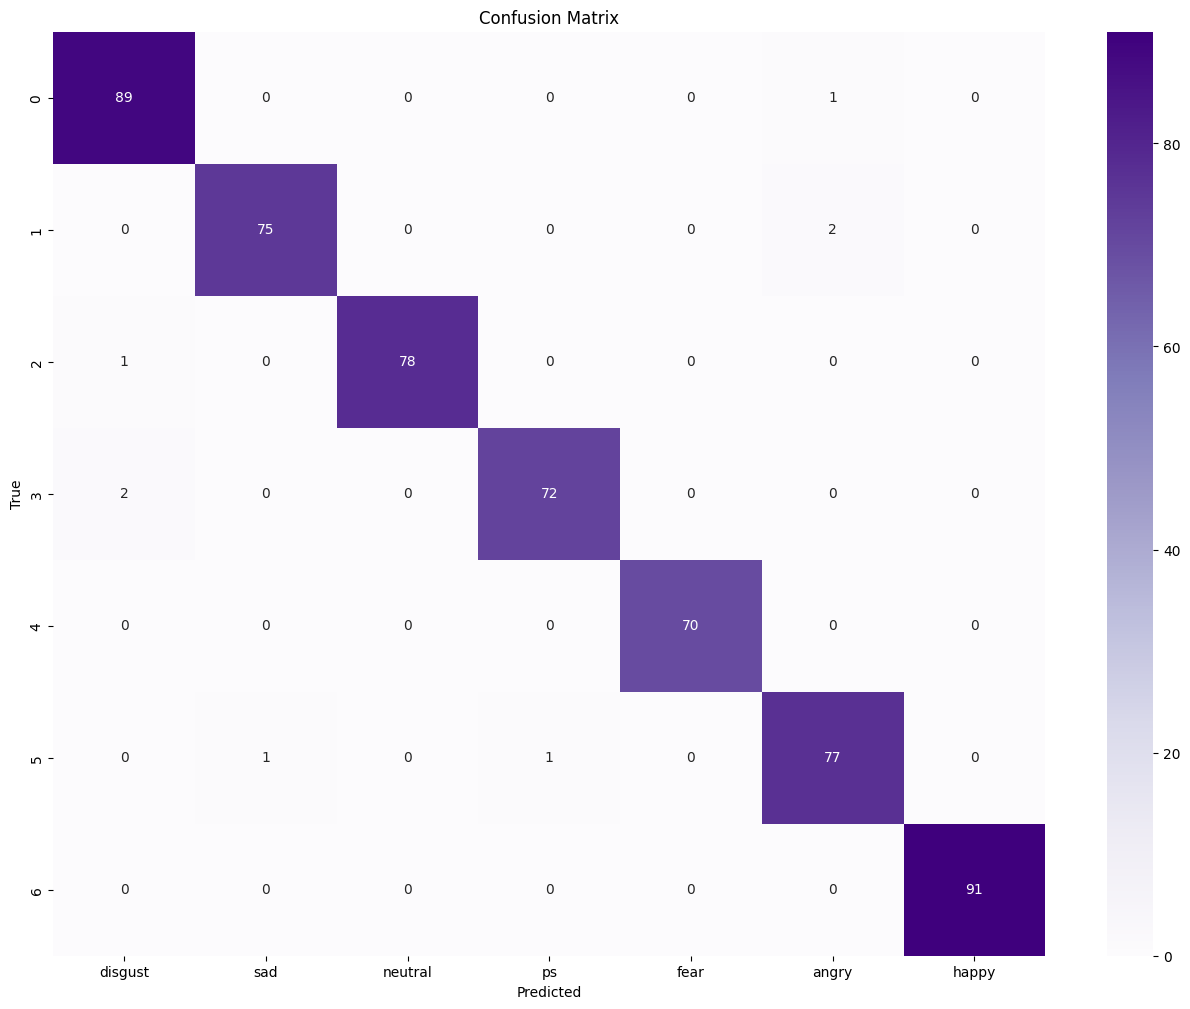

In [ ]:
# Correlation HeatMap

plt.figure(figsize = (16, 12))
sns.heatmap(Conf_Matrix, annot = True, fmt = 'd', cmap = 'Purples', xticklabels = Target_Emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()